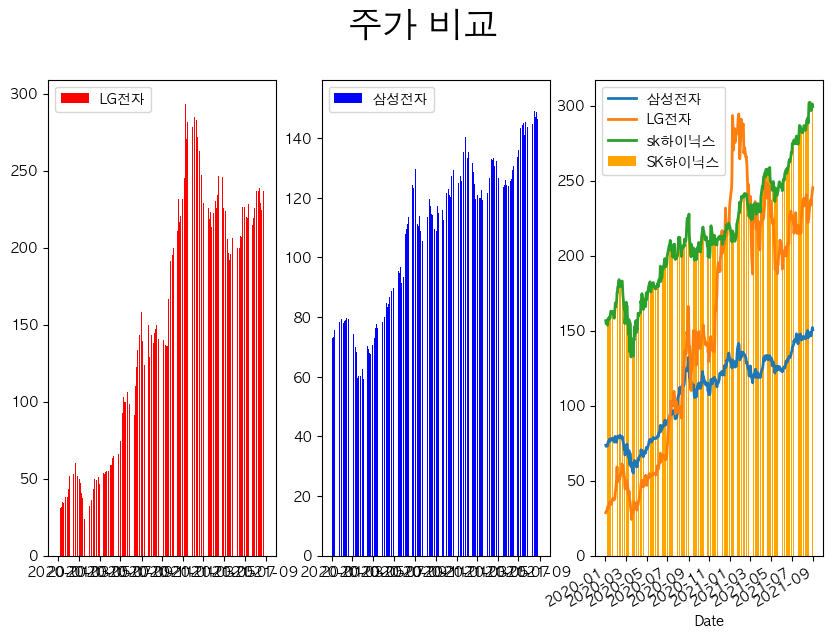

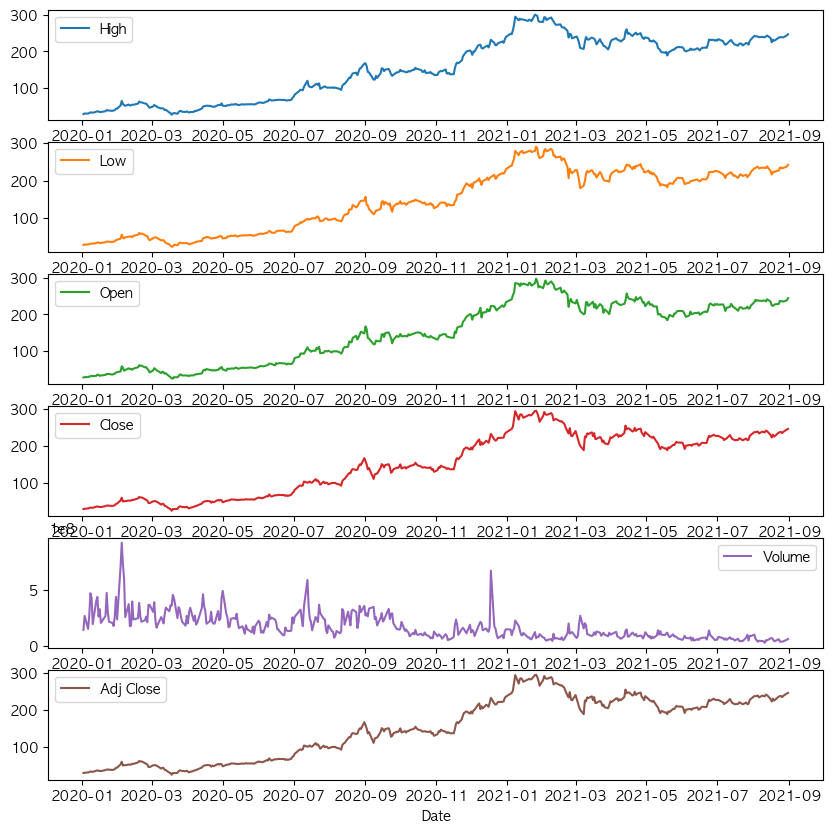

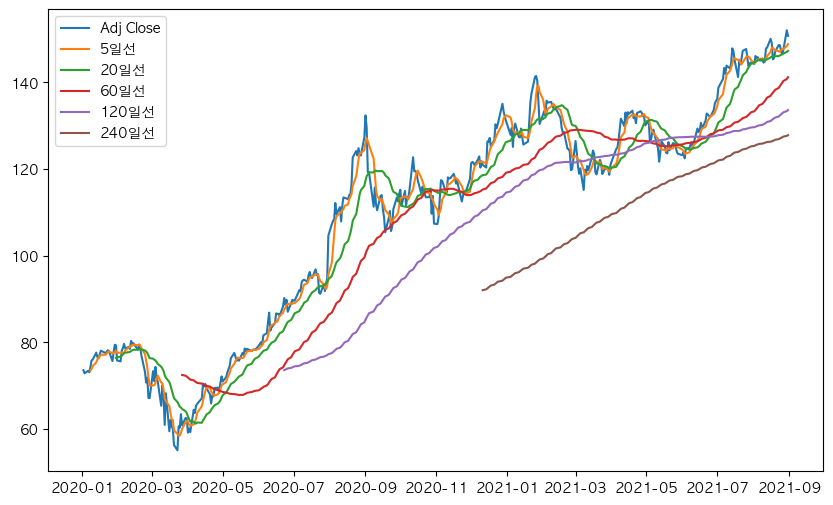

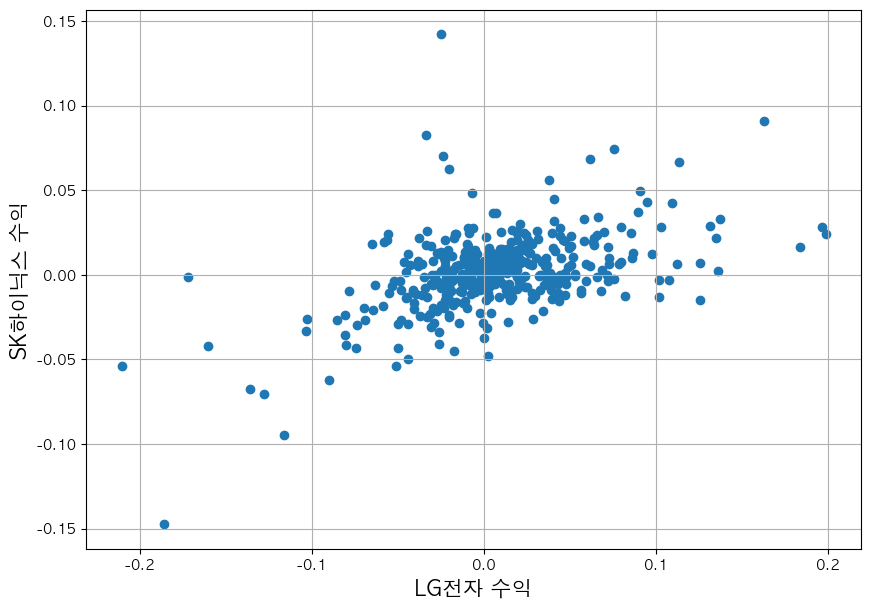

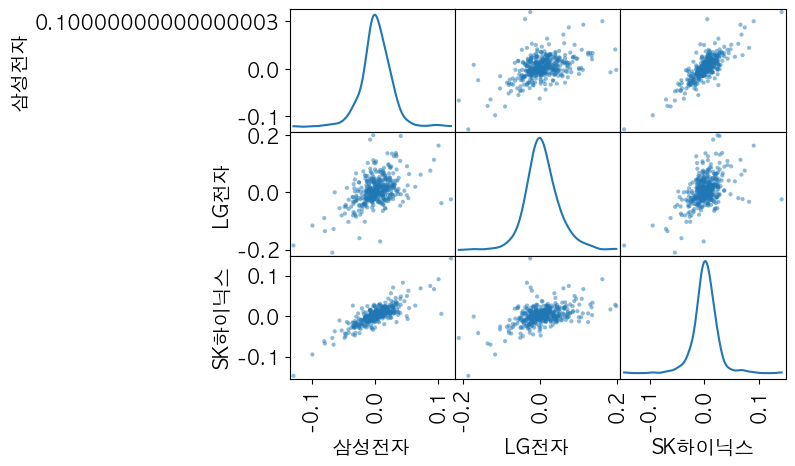

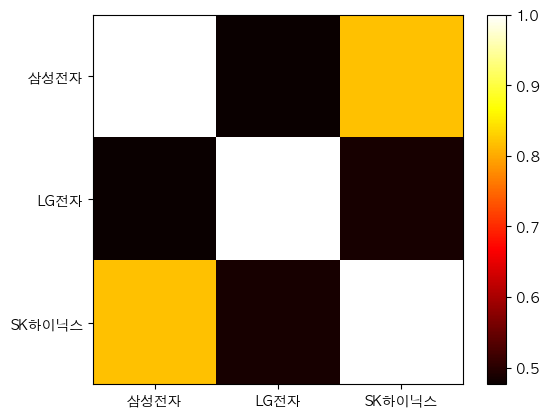

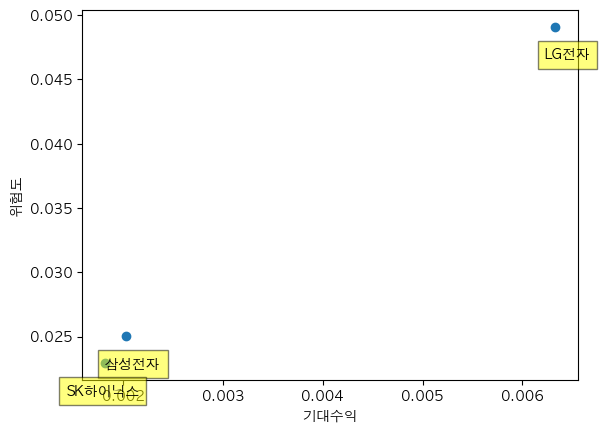

In [4]:
!pip install pandas-datareader

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import platform

start = datetime(2020,1,2)
end = datetime(2021,8,31)

ss = web.DataReader('AAPL','yahoo', start, end)
lg = web.DataReader('TSLA','yahoo', start, end)
sk = web.DataReader('MSFT','yahoo', start, end)

from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.bar(lg.index, lg['Adj Close'], label='LG전자', color='red', lw=2)
plt.legend()

plt.subplot(132)
plt.bar(ss.index, ss['Adj Close'], label='삼성전자', color='blue', lw=2)
plt.legend()

plt.subplot(133)
plt.bar(sk.index, sk['Adj Close'], label='SK하이닉스', color='orange', lw=2)
plt.legend()

plt.suptitle('주가 비교', fontsize=25)


ss['Adj Close'].plot(figsize=(10,7), label='삼성전자',lw=2)
lg['Adj Close'].plot(figsize=(10,7), label='LG전자',lw=2)
sk['Adj Close'].plot(figsize=(10,7), label='sk하이닉스',lw=2)

plt.legend()
plt.show()

lg.plot(subplots=True, layout=(6,1), figsize=(10,10),sharex=False)
plt.show()


#5일 , 20일, 60일 ,120일 단위로 평균을 구한다.
ra5 = ss['Adj Close'].rolling(window=5).mean()
ra20 = ss['Adj Close'].rolling(window=20).mean()
ra60 = ss['Adj Close'].rolling(window=60).mean()
ra120 = ss['Adj Close'].rolling(window=120).mean()
ra240 = ss['Adj Close'].rolling(window=240).mean()
plt.show()


plt.figure(figsize=(10,6))

plt.plot(ss.index, ss['Adj Close'], label='Adj Close', lw=1.5)
plt.plot(ss.index, ra5, label='5일선', lw=1.5)
plt.plot(ss.index, ra20, label='20일선', lw=1.5)
plt.plot(ss.index, ra60, label='60일선', lw=1.5)
plt.plot(ss.index, ra120, label='120일선', lw=1.5)
plt.plot(ss.index, ra240, label='240일선', lw=1.5)

plt.legend(loc='best')
plt.show()


ss1 = web.DataReader('AAPL','yahoo', start, end)
lg1 = web.DataReader('TSLA','yahoo', start, end)
sk1 = web.DataReader('MSFT','yahoo', start, end)

ss1 = ss1['Adj Close']
lg1 = lg1['Adj Close']
sk1 = sk1['Adj Close']

comp = pd.concat([ss1, lg1,sk1], axis=1)

comp.columns = pd.Index(['삼성전자','LG전자','SK하이닉스'])
comp


pctcomp = comp.pct_change()
corr = pctcomp.corr()
corr


plt.figure(figsize=(10,7))
plt.scatter(pctcomp.LG전자, pctcomp.SK하이닉스)
plt.xlabel('LG전자 수익', fontsize=15)
plt.ylabel('SK하이닉스 수익', fontsize=15)
plt.grid()
plt.show()


scat = pd.plotting.scatter_matrix(pctcomp, diagonal='kde')
for ax in scat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(labelsize=14)
  
plt.show()
    
# 색상이 옅을수록 주식간 관련성이 크다. 
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


#주가 하락 위험도, 기대 수익

plt.scatter(pctcomp.mean(), pctcomp.std())
plt.xlabel('기대수익')
plt.ylabel('위험도')
for label, x,y in zip(pctcomp.columns, pctcomp.mean(), pctcomp.std()):
    plt.annotate(
        label, 
        xy=(x,y), xytext=(25,-25),
        textcoords='offset points',
        horizontalalignment='right',
        verticalalignment='bottom',
        bbox = dict(boxstyle='square', pad=0.5, fc='yellow', alpha=0.5)
    )
plt.show()    